# **World Happiness Dataset: Advanced EDA with D3.js Visualizations**

## **Objective**
The objective of this notebook is to perform an in-depth Exploratory Data Analysis (EDA) on the **World Happiness Dataset** using Python for data processing and **D3.js** for advanced and interactive visualizations. This analysis will uncover patterns, relationships, and insights into the factors influencing happiness across the globe.

---

## **Dataset Description**
The **World Happiness Dataset** is derived from the **World Happiness Report**, which evaluates and ranks countries based on key indicators of happiness. This dataset includes:
- **Country**: Name of the country.
- **Happiness Score**: The average happiness level of citizens on a scale of 1 to 10.
- **GDP per Capita**: Economic performance per individual.
- **Social Support**: The extent of social connections.
- **Healthy Life Expectancy**: Expected years of healthy living.
- **Freedom to Make Life Choices**: Perception of individual freedom.
- **Generosity**: Community support and charitable contributions.
- **Corruption Perception**: Level of corruption in the government and business.

---

## **Key Questions**
1. What are the top-ranking and bottom-ranking countries in terms of happiness?
2. How do factors like GDP, Social Support, and Life Expectancy correlate with Happiness Scores?
3. Are there geographic trends in happiness levels?
4. Can interactive visualizations like scatter plots, bar charts, and maps reveal hidden insights?

---

## **Tools and Techniques**
1. **Python Libraries**:
   - `pandas`: For data manipulation and cleaning.
   - `matplotlib` and `seaborn`: For initial static visualizations.
   - `plotly`: For geographic visualizations (choropleth maps).
2. **D3.js**:
   - To create advanced and interactive visualizations such as scatter plots, bar charts, and heatmaps embedded directly into the notebook.
3. **Google Colab**: For an interactive coding environment with Python and JavaScript integration.

---

## **Visualizations**
This notebook will include:
1. **Static Visualizations** (Python):
   - Distribution of Happiness Scores.
   - Correlation heatmaps between features.
2. **Interactive Visualizations** (D3.js):
   - Interactive scatter plot: Happiness Score vs. GDP per Capita.
   - Choropleth map: Happiness Score by Country.
   - Dynamic bar chart: Top 10 happiest countries.

---

## **Structure of the Notebook**
1. **Data Loading and Cleaning**:
   - Importing data and handling missing values.
2. **Basic EDA**:
   - Descriptive statistics and initial visualizations.
3. **Advanced Visualizations**:
   - Using D3.js for interactive analysis.
4. **Insights**:
   - Interpretation and summary of findings.

---

## **Outcome**
By the end of this analysis, you will gain a deeper understanding of the factors influencing happiness across the world. The advanced D3.js visualizations will add a layer of interactivity, making this EDA project both insightful and visually appealing.


In [1]:
!pip install pandas matplotlib seaborn plotly


In [3]:
#Set Up D3.js Embed D3.js
from IPython.display import HTML

d3_script = """
<script src="https://d3js.org/d3.v7.min.js"></script>
"""
HTML(d3_script)


In [4]:
from google.colab import files

# Step 1: Upload Kaggle API token
print("Please upload your kaggle.json file (API token from Kaggle):")
files.upload()  # Prompt to upload kaggle.json

# Step 2: Configure Kaggle API
# Create Kaggle directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download World Happiness dataset
# Replace with the correct dataset name from Kaggle
!kaggle datasets download -d unsdsn/world-happiness -p ./world_happiness_data/

# Step 4: Extract the downloaded dataset
!unzip ./world_happiness_data/world-happiness.zip -d ./world_happiness_data/

# Step 5: Confirmation
print("World Happiness dataset downloaded and extracted successfully!")


Please upload your kaggle.json file (API token from Kaggle):


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 48.8MB/s]
Archive:  ./world_happiness_data/world-happiness.zip
  inflating: ./world_happiness_data/2015.csv  
  inflating: ./world_happiness_data/2016.csv  
  inflating: ./world_happiness_data/2017.csv  
  inflating: ./world_happiness_data/2018.csv  
  inflating: ./world_happiness_data/2019.csv  
World Happiness dataset downloaded and extracted successfully!


#Step 1: Load and Inspect the 2019 Dataset

In [5]:
import pandas as pd
import os

# File path
path = './world_happiness_data'
file_path = os.path.join(path, '2019.csv')

# Load the dataset
happiness_2019 = pd.read_csv(file_path)

# Display the first few rows
happiness_2019.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
# Summary of the dataset
print(happiness_2019.info())

# Column names
print("Columns in the dataset:", happiness_2019.columns)

# Check for missing values
print("Missing values:\n", happiness_2019.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
Columns in the dataset: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life cho

# Step 2: Clean the Data

In [7]:
# Optional: Drop columns that aren't needed
columns_to_keep = [
    'Country or region',
    'Overall rank',
    'Score',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
]
happiness_2019 = happiness_2019[columns_to_keep]

# Rename columns for easier usage
happiness_2019.columns = [
    'Country',
    'Rank',
    'Happiness Score',
    'GDP per Capita',
    'Social Support',
    'Healthy Life Expectancy',
    'Freedom',
    'Generosity',
    'Corruption',
]

# Display the cleaned dataset
happiness_2019.head()


,Country,Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
# Check for duplicates
print("Number of duplicate rows:", happiness_2019.duplicated().sum())

# Drop duplicates if any
happiness_2019 = happiness_2019.drop_duplicates()


Number of duplicate rows: 0


In [9]:
# Fill or drop missing values
happiness_2019 = happiness_2019.dropna()


#Step 3: Basic EDA

In [10]:
# Summary statistics for numeric columns
happiness_2019.describe()


,Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [11]:
# Top 10 happiest countries
print("Top 10 Happiest Countries:")
print(happiness_2019.nlargest(10, 'Happiness Score')[['Country', 'Happiness Score']])

# Bottom 10 happiest countries
print("Bottom 10 Happiest Countries:")
print(happiness_2019.nsmallest(10, 'Happiness Score')[['Country', 'Happiness Score']])


Top 10 Happiest Countries:
       Country  Happiness Score
0      Finland            7.769
1      Denmark            7.600
2       Norway            7.554
3      Iceland            7.494
4  Netherlands            7.488
5  Switzerland            7.480
6       Sweden            7.343
7  New Zealand            7.307
8       Canada            7.278
9      Austria            7.246
Bottom 10 Happiest Countries:
                      Country  Happiness Score
155               South Sudan            2.853
154  Central African Republic            3.083
153               Afghanistan            3.203
152                  Tanzania            3.231
151                    Rwanda            3.334
150                     Yemen            3.380
149                    Malawi            3.410
148                     Syria            3.462
147                  Botswana            3.488
146                     Haiti            3.597


                             Rank  Happiness Score  GDP per Capita  \
Rank                     1.000000        -0.989096       -0.801947   
Happiness Score         -0.989096         1.000000        0.793883   
GDP per Capita          -0.801947         0.793883        1.000000   
Social Support          -0.767465         0.777058        0.754906   
Healthy Life Expectancy -0.787411         0.779883        0.835462   
Freedom                 -0.546606         0.566742        0.379079   
Generosity              -0.047993         0.075824       -0.079662   
Corruption              -0.351959         0.385613        0.298920   

                         Social Support  Healthy Life Expectancy   Freedom  \
Rank                          -0.767465                -0.787411 -0.546606   
Happiness Score                0.777058                 0.779883  0.566742   
GDP per Capita                 0.754906                 0.835462  0.379079   
Social Support                 1.000000                 0

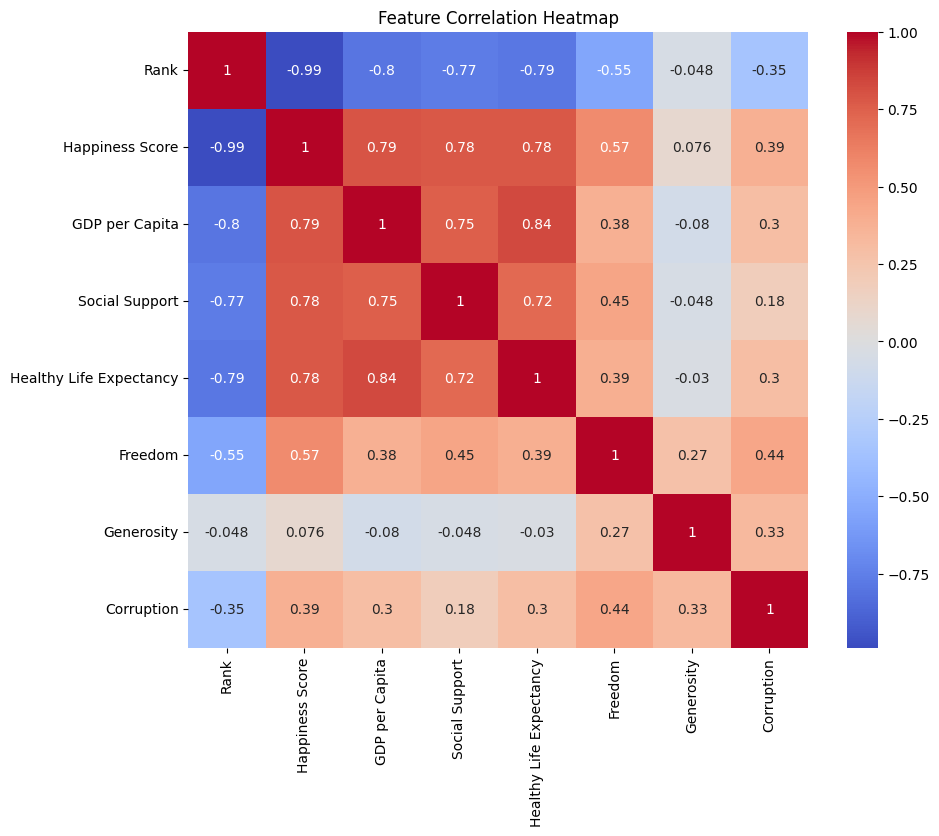

In [14]:
# Correlation between numerical features
# Select numeric columns
numeric_data = happiness_2019.select_dtypes(include=['float64', 'int64'])

# Compute correlation
correlation = numeric_data.corr()
print(correlation)

# List numeric columns
print("Numeric Columns:", numeric_data.columns)


import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


#Step 4: Static Visualizations (Quick Insights)

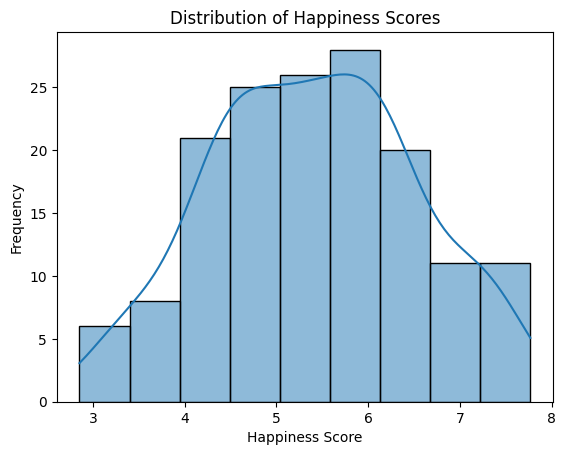

In [15]:
#Happiness Score Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Happiness Scores
sns.histplot(happiness_2019['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


#Happiness Score vs. GDP

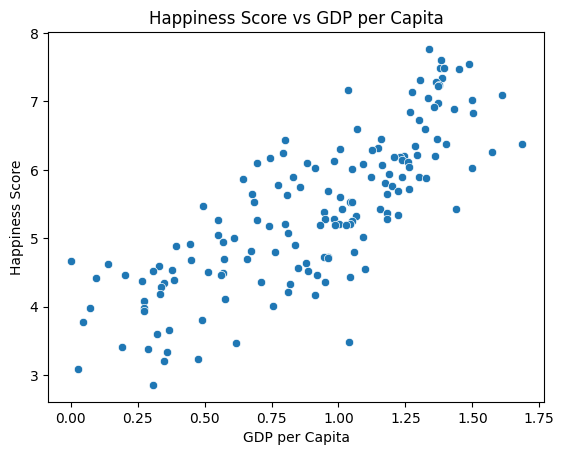

In [16]:
# Scatter plot for Happiness Score vs GDP
sns.scatterplot(x='GDP per Capita', y='Happiness Score', data=happiness_2019)
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()



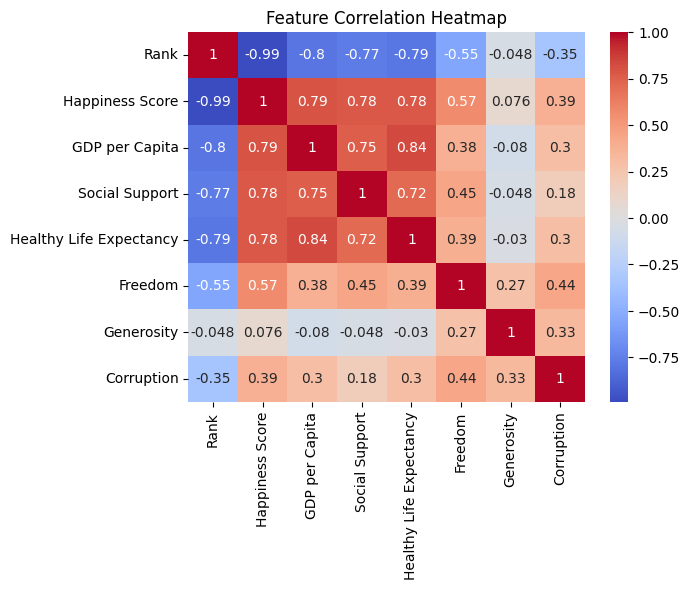

In [17]:
# Heatmap for correlations
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Step 5: Advanced Visualizations with D3.js

In [18]:
from IPython.display import HTML

# Embed D3.js into the notebook
d3_script = """
<script src="https://d3js.org/d3.v7.min.js"></script>
"""
HTML(d3_script)


In [28]:
import json

# Prepare data for scatter plot (Happiness Score vs GDP per Capita)
scatter_data = happiness_2019[['Country', 'Happiness Score', 'GDP per Capita']].to_dict('records')
scatter_data_json = json.dumps(scatter_data)

# Prepare data for bar chart (Top 10 Happiest Countries)
top_10 = happiness_2019.nlargest(10, 'Happiness Score')[['Country', 'Happiness Score']].to_dict('records')
top_10_json = json.dumps(top_10)



In [26]:
scatter_plot_html = f"""
<div id="scatterplot" style="width: 800px; height: 500px;"></div>
<script src="https://d3js.org/d3.v7.min.js"></script>
<script>
    // Dataset passed from Python
    const data = {scatter_data_json};

    // Set up SVG canvas dimensions
    const margin = {{top: 20, right: 30, bottom: 50, left: 50}},
          width = 800 - margin.left - margin.right,
          height = 500 - margin.top - margin.bottom;

    const svg = d3.select("#scatterplot").append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
        .append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // Create scales
    const x = d3.scaleLinear()
        .domain([0, d3.max(data, d => d["GDP per Capita"])])
        .range([0, width]);

    const y = d3.scaleLinear()
        .domain([0, d3.max(data, d => d["Happiness Score"])])
        .range([height, 0]);

    // Add axes
    svg.append("g")
        .attr("transform", "translate(0," + height + ")")
        .call(d3.axisBottom(x));

    svg.append("g")
        .call(d3.axisLeft(y));

    // Add dots
    svg.selectAll("circle")
        .data(data)
        .enter()
        .append("circle")
        .attr("cx", d => x(d["GDP per Capita"]))
        .attr("cy", d => y(d["Happiness Score"]))
        .attr("r", 5)
        .style("fill", "steelblue")
        .on("mouseover", function(event, d) {{
            d3.select(this).attr("r", 8).style("fill", "orange");
        }})
        .on("mouseout", function() {{
            d3.select(this).attr("r", 5).style("fill", "steelblue");
        }});
</script>
"""
HTML(scatter_plot_html)


#  Bar Chart: Top 10 Happiest Countries

In [29]:
# Prepare Top 10 data for bar chart
top_10 = happiness_2019.nlargest(10, 'Happiness Score').to_dict('records')
top_10_json = json.dumps(top_10)

bar_chart_html = f"""
<div id="barchart" style="width: 800px; height: 500px;"></div>
<script src="https://d3js.org/d3.v7.min.js"></script>
<script>
    // Dataset passed from Python
    const data = {top_10_json};

    // Set up SVG canvas dimensions
    const margin = {{top: 20, right: 30, bottom: 70, left: 50}},
          width = 800 - margin.left - margin.right,
          height = 500 - margin.top - margin.bottom;

    const svg = d3.select("#barchart").append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
        .append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // Create scales
    const x = d3.scaleBand()
        .domain(data.map(d => d.Country))
        .range([0, width])
        .padding(0.2);

    const y = d3.scaleLinear()
        .domain([0, d3.max(data, d => d["Happiness Score"])])
        .range([height, 0]);

    // Add axes
    svg.append("g")
        .attr("transform", "translate(0," + height + ")")
        .call(d3.axisBottom(x))
        .selectAll("text")
        .attr("transform", "rotate(-40)")
        .style("text-anchor", "end");

    svg.append("g")
        .call(d3.axisLeft(y));

    // Add bars
    svg.selectAll("rect")
        .data(data)
        .enter()
        .append("rect")
        .attr("x", d => x(d.Country))
        .attr("y", d => y(d["Happiness Score"]))
        .attr("width", x.bandwidth())
        .attr("height", d => height - y(d["Happiness Score"]))
        .style("fill", "teal");
</script>
"""
HTML(bar_chart_html)


#Heatmap: Correlation Between Features

In [33]:
import numpy as np # Import numpy and alias it as 'np'

# Compute correlations and prepare JSON data
# Select only numeric columns for correlation calculation
numeric_columns = happiness_2019.select_dtypes(include=np.number).columns
corr_matrix = happiness_2019[numeric_columns].corr().round(2)

corr_matrix_reset = corr_matrix.reset_index().melt(id_vars='index')
corr_matrix_reset.columns = ['index', 'variable', 'value']  # Rename columns for D3.js compatibility

# Convert to JSON
corr_matrix_json = json.dumps(corr_matrix_reset.to_dict('records'))

In [34]:
from IPython.display import HTML

heatmap_html = f"""
<div id="heatmap" style="width: 800px; height: 500px;"></div>
<script src="https://d3js.org/d3.v7.min.js"></script>
<script>
    // Dataset passed from Python
    const data = {corr_matrix_json};

    // Set up SVG canvas dimensions
    const margin = {{top: 20, right: 30, bottom: 50, left: 50}},
          width = 800 - margin.left - margin.right,
          height = 500 - margin.top - margin.bottom;

    const svg = d3.select("#heatmap").append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
        .append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // Define scales
    const x = d3.scaleBand()
        .domain([...new Set(data.map(d => d.index))])
        .range([0, width])
        .padding(0.05);

    const y = d3.scaleBand()
        .domain([...new Set(data.map(d => d.variable))])
        .range([0, height])
        .padding(0.05);

    const color = d3.scaleSequential(d3.interpolateCool)
        .domain([-1, 1]);

    // Add heatmap squares
    svg.selectAll("rect")
        .data(data)
        .enter()
        .append("rect")
        .attr("x", d => x(d.index))
        .attr("y", d => y(d.variable))
        .attr("width", x.bandwidth())
        .attr("height", y.bandwidth())
        .style("fill", d => color(d.value));

    // Add x-axis
    svg.append("g")
        .attr("transform", "translate(0," + height + ")")
        .call(d3.axisBottom(x))
        .selectAll("text")
        .attr("transform", "rotate(-45)")
        .style("text-anchor", "end");

    // Add y-axis
    svg.append("g")
        .call(d3.axisLeft(y));
</script>
"""
HTML(heatmap_html)


In [35]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.7 MB/s eta 0:00:00
   ━━━━━

In [1]:
import pandas as pd

# Load the dataset
path = './world_happiness_data'
file_path = f'{path}/2019.csv'
happiness_2019 = pd.read_csv(file_path)

# Select relevant columns
happiness_2019 = happiness_2019[['Score', 'GDP per capita', 'Social support',
                                 'Healthy life expectancy', 'Freedom to make life choices',
                                 'Generosity', 'Perceptions of corruption']]

# Rename columns for convenience
happiness_2019.columns = ['Happiness Score', 'GDP per Capita', 'Social Support',
                          'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']

# Check the data
print(happiness_2019.head())


   Happiness Score  GDP per Capita  Social Support  Life Expectancy  Freedom  \
0            7.769           1.340           1.587            0.986    0.596   
1            7.600           1.383           1.573            0.996    0.592   
2            7.554           1.488           1.582            1.028    0.603   
3            7.494           1.380           1.624            1.026    0.591   
4            7.488           1.396           1.522            0.999    0.557   

   Generosity  Corruption  
0       0.153       0.393  
1       0.252       0.410  
2       0.271       0.341  
3       0.354       0.118  
4       0.322       0.298  


In [3]:

from pycaret.regression import *

# Initialize PyCaret regression setup
regression_setup = setup(data=happiness_2019,
                         target='Happiness Score',
                         session_id=123,
                         normalize=True)


,Description,Value
0,Session id,123
1,Target,Happiness Score
2,Target type,Regression
3,Original data shape,"(156, 7)"
4,Transformed data shape,"(156, 7)"
5,Transformed train set shape,"(109, 7)"
6,Transformed test set shape,"(47, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [4]:
# Compare all regression models
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4169,0.2930,0.5288,0.6746,0.0905,0.0862,0.1420
ada,AdaBoost Regressor,0.4323,0.3060,0.5400,0.6555,0.0919,0.0885,0.1070
rf,Random Forest Regressor,0.4353,0.3072,0.5435,0.6518,0.0927,0.0891,0.3230
lightgbm,Light Gradient Boosting Machine,0.4561,0.3348,0.5703,0.6351,0.0983,0.0951,0.1100
br,Bayesian Ridge,0.4485,0.3162,0.5468,0.6279,0.0922,0.0908,0.0330
ridge,Ridge Regression,0.4491,0.3187,0.5486,0.6244,0.0927,0.0910,0.0340
lr,Linear Regression,0.4496,0.3196,0.5493,0.6233,0.0929,0.0911,1.0480
lar,Least Angle Regression,0.4496,0.3196,0.5493,0.6233,0.0929,0.0911,0.0350
gbr,Gradient Boosting Regressor,0.4608,0.3411,0.5717,0.6204,0.0980,0.0943,0.0900
knn,K Neighbors Regressor,0.4292,0.3459,0.5734,0.6172,0.0989,0.0914,0.0610


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
# Tune the best model
tuned_model = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5101,0.5866,0.7659,0.3387,0.1478,0.1319
1,0.4413,0.3985,0.6313,0.6871,0.1100,0.0920
2,0.4173,0.2862,0.5349,0.6232,0.0757,0.0705
3,0.3807,0.2319,0.4815,0.8505,0.0920,0.0855
4,0.3889,0.2045,0.4522,0.7910,0.0654,0.0647
5,0.4659,0.3184,0.5642,0.7344,0.0894,0.0876
6,0.3174,0.1447,0.3803,0.5975,0.0583,0.0584
7,0.4324,0.2727,0.5222,0.8420,0.0936,0.0944
8,0.4885,0.3180,0.5639,0.7328,0.1102,0.1169


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [6]:
# Evaluate the tuned model
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
# Make predictions on the same dataset
predictions = predict_model(tuned_model)

# Check available columns in the predictions DataFrame
print(predictions.columns)

# Access the predicted values using the correct column name
predictions[['Happiness Score', 'prediction_label']] # or predictions[['Happiness Score', 'Label']] if the column is named Label

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3456,0.2056,0.4535,0.8533,0.0761,0.0708


Index(['GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom',
       'Generosity', 'Corruption', 'Happiness Score', 'prediction_label'],
      dtype='object')


,Happiness Score,prediction_label
90,5.197,5.23490
137,4.107,4.66867
133,4.286,4.25587
24,6.446,6.68355
138,4.085,4.26066
129,4.366,5.82132
41,6.149,5.76933
42,6.125,5.79590
82,5.285,5.28093
112,4.639,4.71067


In [9]:
# Finalize the model
final_model = finalize_model(tuned_model)

# Save the model for future use
save_model(final_model, 'happiness_model_2019')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['GDP per Capita', 'Social Support',
                                              'Life Expectancy', 'Freedom',
                                              'Generosity', 'Corruption'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'happiness_model_2019.pkl')